<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself.<br>
<b>Name1</b>: Veton Abazovic<br>
<b>Name2 (optional) </b>:<br>
<b>NetID 1</b>: va187<br>
<b>NetID 2 (optional)</b>:<br>
<b>Recitation1 (Mon-1/Fri-2)</b>: Fri-2<br>
<b>Recitation2 (Mon-1/Fri-2) - optional </b>:<br>
<b>Notes to Grader</b> (optional):<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>: VA      


<h3>Grader Notes</h3>
<b>Your Grade<b>:<br>
<b>Grader Initials</b>:<br>
<b>Grader Comments</b> (optional):<br>
</div>

### CS 439 - Introduction to Data Science
### Spring 2019

# Midsemester Project : Twitter Analysis

### Due Date : Friday March 15, 2019 by 11:59 PM.###


### About this project
This is your mid-semester project. You are allowed to work with a partner (if you'd like). Only one partner (two per group is allowed). The goal of this mid-semester project is to work with Twitter API to analyze tweets from a person, in this case, President Donald Trump.  @RealDonaldTrump tweets provide a great opportunity to understand how online media can be used to communicate over the traditional media. Moreoover, Trump tweets has become so consequential, they actually can move the stock market on short term. Short term investors must now always pay attention to Trump tweets before trading. 

We hope this project will be fun as we can analyze range of emotions, hope, controversy, vagueness that are part of Trump tweets. We are interested in seeing what conclusions you can draw from US Presidents tweets. 
* DISCLAIMER: This project is not designed with any bias in mind. Note that we could pick either candiadate (Hillary Clinton or Donald Trump) or anyone else to do the same analysis. We hope your analysis is objective, independent of any political bias you may have. As Data Scientists, it is our responsiblity to do independent analysis of the data we try to understand. You should follow data and interpret w/o any bias.


## Set up
Let us get all the libaries initialized as necessary

In [22]:
# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import json

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

## Downloading Recent Tweets
It is important to download the most recent tweets (especially if you are working as a group). Those who are working by themselves are allowed to use the downloaded files w/o setting up access to any twitter API (which can sometime be bit complicated). Twitter provides the API Tweepy (http://www.tweepy.org/) that makes it easy to access twitter content that is publicly available. We will also provide example code as needed.

In [23]:
## Make sure you have set up tweepy if you are working locally.
# https://www.pythoncentral.io/introduction-to-tweepy-twitter-for-python/
# After set up, the following should run:
import tweepy

## PART 1:  Accessing Twitter API
In order to access Twitter API, you need to get keys by signing up as a Twitter developer. We will walk you through this process. 
* if you are working by your self on this project, you can skip PART 1, and complete the project using the data files provided in the data folder. That is PART 1 is optional. However, we highly recommend that you do Part 1 (after completing the project with offline data)

### Task 1.1

Follow the instructions below to get your Twitter API keys.  **Read the instructions completely before starting.**

1. [Create a Twitter account](https://twitter.com/).  You can use an existing account if you have one; if you prefer to not do this assignment under your regular account, feel free to create a throw-away account.
2. Under account settings, add your phone number to the account.
3. [Create a Twitter developer account](https://developer.twitter.com/en/apply/) by clicking the 'Apply' button on the top right of the page. Attach it to your Twitter account. You'll have to fill out a form describing what you want to do with the developer account. Explain that you are doing this for a class at Rutgers University and that you don't know exactly what you're building yet and just need the account to get started. These applications are approved by some sort of AI system, so it doesn't matter exactly what you write. Just don't enter a bunch of alweiofalwiuhflawiuehflawuihflaiwhfe type stuff or you might get rejected.
4. Once you're logged into your developer account, [create an application for this assignment](https://apps.twitter.com/app/new).  You can call it whatever you want, and you can write any URL when it asks for a web site.  You don't need to provide a callback URL.
5. On the page for that application, find your Consumer Key and Consumer Secret.
6. On the same page, create an Access Token.  Record the resulting Access Token and Access Token Secret.
7. Edit the file [keys.json](keys.json) and replace the placeholders with your keys.

## WARNING (Please Read) !!!!


### Protect your Twitter Keys
<span style="color:red">
If someone has your authentication keys, they can access your Twitter account and post as you!  So don't give them to anyone, and **don't write them down in this notebook**. 
</span>
The usual way to store sensitive information like this is to put it in a separate file and read it programmatically.  That way, you can share the rest of your code without sharing your keys.  That's why we're asking you to put your keys in `keys.json` for this assignment.


### Avoid making too many API calls.

<span style="color:red">
Twitter limits developers to a certain rate of requests for data.  If you make too many requests in a short period of time, you'll have to wait awhile (around 15 minutes) before you can make more.  </span> 
So carefully follow the code examples you see and don't rerun cells without thinking.  Instead, always save the data you've collected to a file.  We've provided templates to help you do that.


### Be careful about which functions you call!

<span style="color:red">
This API can retweet tweets, follow and unfollow people, and modify your twitter settings.  Be careful which functions you invoke! </span> It is possible that you can accidentally re-tweet some tweets because you typed `retweet` instead of `retweet_count`. 
</span>


In [24]:
import json
key_file = 'keys.json'
# Loading your keys from keys.json (which you should have filled
# in in question 1):
with open(key_file) as f:
    keys = json.load(f)
# if you print or view the contents of keys be sure to delete the cell!

FileNotFoundError: [Errno 2] No such file or directory: 'keys.json'

### Task 1.2 Testing Twitter Authentication
This following code should run w/o erros or warnings and display yur twitter username. If you are working as a team, try to get a new twitter account with user names as :  student1NetId_Student2NetId (eg:  ds1089_adg133)

In [ ]:
import tweepy
from tweepy import TweepError
import logging

try:
    auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
    auth.set_access_token(keys["access_token"], keys["access_token_secret"])
    api = tweepy.API(auth)
    print("Your username is:", api.auth.get_username())
except TweepError as e:
    logging.warning("There was a Tweepy error. Double check your API keys and try again.")
    logging.warning(e)

## PART 2 - Working with Twitter
The json file in data folder contains (not provided yet) some loaded tweets from @RutgersU. Run it and read the code. You can also try other json files in the data folder to try this. 

In [ ]:
from pathlib import Path
import json
import tweepy
from tweepy import TweepError
import logging
ds_tweets_save_path = "data/realdonaldtrump_old_tweets"   # need to get this file

# Guarding against attempts to download the data multiple
# times:
if not Path(ds_tweets_save_path).is_file():
    # Getting as many recent tweets by @RutgersU as Twitter will let us have.
    # We use tweet_mode='extended' so that Twitter gives us full 280 character tweets.
    # This was a change introduced in September 2017.
    
    # The tweepy Cursor API actually returns "sophisticated" Status objects but we 
    # will use the basic Python dictionaries stored in the _json field. 
    example_tweets = [t._json for t in tweepy.Cursor(api.user_timeline, id="RutgersU", tweet_mode='extended').items()]
    
    # Saving the tweets to a json file on disk for future analysis
    with open(ds_tweets_save_path, "w") as f:        
        json.dump(example_tweets, f)

# Re-loading the json file:
with open(ds_tweets_save_path, "r") as f:
    example_tweets = json.load(f)

If things ran as expected, you should be able to look at the first tweet by running the code below. It probabably does not make sense to view all tweets in a notebook, as size of the tweets can freeze your browser (always a good idea to press ctrl-S to save the latest, in case you have to restart Jupyter)

In [ ]:
# Looking at one tweet object, which has type Status: 
from pprint import pprint # ...to get a more easily-readable view.
pprint(example_tweets[0])

### Task 2.1

### What you need to do. 

Re-factor the above code fragment into reusable snippets below.  You should not need to make major modifications; this is mostly an exercise in understanding the above code block. 

In [ ]:
def load_keys(path):
    """Loads your Twitter authentication keys from a file on disk.
    
    Args:
        path (str): The path to your key file.  The file should
          be in JSON format and look like this (but filled in):
            {
                "consumer_key": "<your Consumer Key here>",
                "consumer_secret":  "<your Consumer Secret here>",
                "access_token": "<your Access Token here>",
                "access_token_secret": "<your Access Token Secret here>"
            }
    
    Returns:
        dict: A dictionary mapping key names (like "consumer_key") to
          key values."""
    
    ### BEGIN SOLUTION
   
    # your solution here

    ### END SOLUTION

In [ ]:
def download_recent_tweets_by_user(user_account_name, keys):
    """Downloads tweets by one Twitter user.

    Args:
        user_account_name (str): The name of the Twitter account
          whose tweets will be downloaded.
        keys (dict): A Python dictionary with Twitter authentication
          keys (strings), like this (but filled in):
            {
                "consumer_key": "<your Consumer Key here>",
                "consumer_secret":  "<your Consumer Secret here>",
                "access_token": "<your Access Token here>",
                "access_token_secret": "<your Access Token Secret here>"
            }

    Returns:
        list: A list of Dictonary objects, each representing one tweet."""
    import tweepy
    
    ### BEGIN SOLUTION
    # Authenticating:
    
    # your solution here
    
    ### END SOLUTION

In [ ]:
def load_tweets(path):
    """Loads tweets that have previously been saved.
    
    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.
    
    Args:
        path (str): The place where the tweets were be saved.

    Returns:
        list: A list of Dictionary objects, each representing one tweet."""
    
    ### BEGIN SOLUTION
    
    # your solution here
    
    ### END SOLUTION

In [ ]:
def get_tweets_with_cache(user_account_name, keys_path):
    """Get recent tweets from one user, loading from a disk cache if available.
    
    The first time you call this function, it will download tweets by
    a user.  Subsequent calls will not re-download the tweets; instead
    they'll load the tweets from a save file in your local filesystem.
    All this is done using the functions you defined in the previous cell.
    This has benefits and drawbacks that often appear when you cache data:
    
    +: Using this function will prevent extraneous usage of the Twitter API.
    +: You will get your data much faster after the first time it's called.
    -: If you really want to re-download the tweets (say, to get newer ones,
       or because you screwed up something in the previous cell and your
       tweets aren't what you wanted), you'll have to find the save file
       (which will look like <something>_recent_tweets.pkl) and delete it.
    
    Args:
        user_account_name (str): The Twitter handle of a user, without the @.
        keys_path (str): The path to a JSON keys file in your filesystem.
    """
    
    ### BEGIN SOLUTION
    
    # your solution here
    
    ### END SOLUTION

If everything was implemented correctly you should be able to obtain roughly the last 3000 tweets by the realdonaldtrump. (This may take a few minutes)

In [ ]:
# When you are done, run this cell to load @realdonaldtrump's tweets.
# Note the function get_tweets_with_cache.  You may find it useful
# later.
trump_tweets = get_tweets_with_cache("realdonaldtrump", key_file)
print("Number of tweets downloaded:", len(trump_tweets))

### Task 2.1(alternate)
This alternate starting point is here for those of you who have trouble getting a Twitter developer account. 
You should only use this if Twitter has rejected your application or if they have gone silent on you for at least a day. 
You will miss out on some of the learning experience... but it seems like this might be necessary for some. 
If your twitter account is working fine, you can skip this task! But may need this file anyway since twitter may not allow you to download the old tweets. 
Start by running the following cells, which will download and then load Donald Trump's old tweets.

In [25]:
# Download the dataset
from utils import fetch_and_cache

# if the download is not working, you can find the file in Canvas ==> files
data_url = 'https://rutgers.instructure.com/courses/21255/files/4456420/download?download_frd=1'
file_name = 'realdonaldtrump_recent_tweets.json'

dest_path = fetch_and_cache(data_url=data_url, file=file_name)
print(f'Located at {dest_path}')

Using version already downloaded: Thu Mar  7 15:14:01 2019
MD5 hash of file: e92e9dafdd6e1a97a6aeef9d9ca7d245
Located at data\realdonaldtrump_recent_tweets.json


In [26]:
def load_tweets(path):
    """Loads tweets that have previously been saved.
    
    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.
    
    Args:
        path (str): The place where the tweets were be saved.

    Returns:
        list: A list of Dictionary objects, each representing one tweet."""
    
    with open(path, "rb") as f:
        import json
        return json.load(f)

In [27]:
trump_tweets = load_tweets("data/2016-2017.json")

If everything is working correctly correctly this should load roughly the last 3000 tweets by `realdonaldtrump`.

In [28]:
#assert 2000 <= len(trump_tweets) <= 4000

If the assert statement above works, then continue on to task 2.2.

### Task 2.2

Find the number of the month of the oldest tweet.

In [29]:
#Come back to this
# Enter the number of the month of the oldest tweet (e.g. 1 for January)
"""Testing to see if the dates are already in order"""
#so far the dates are in order
#len(trump_tweets)
#trump_tweets[6829]
dates = []
for i in range(len(trump_tweets)):
    dates.insert(i, trump_tweets[i]['created_at'][4:7])
    
dates
if dates[len(trump_tweets)-1].lower() == 'jan':
  print(1)
elif dates[len(trump_tweets)-1].lower() == 'feb':
  print(2)
elif dates[len(trump_tweets)-1].lower() == 'mar':
  print(3)
elif dates[len(trump_tweets)-1].lower() == 'apr':
  print(4)
elif dates[len(trump_tweets)-1].lower() == 'may':
  print(5)
elif dates[len(trump_tweets)-1].lower() == 'jun':
  print(6)
elif dates[len(trump_tweets)-1].lower() == 'jul':
  print(7)
elif dates[len(trump_tweets)-1].lower() == 'aug':
  print(8)
elif dates[len(trump_tweets)-1].lower() == 'sep':
  print(9)
elif dates[len(trump_tweets)-1].lower() == 'oct':
  print(10)
elif dates[len(trump_tweets)-1].lower() == 'nov':
  print(11)
elif dates[len(trump_tweets)-1].lower() == 'dec':
  print(12)
else:
  print(error)
#oldest_month = 1
#oldest_month

### BEGIN SOLUTION

#*** code to compute **** 

### END SOLUTION

1


## PART 3  Twitter Source Analysis


**IMPORTANT! PLEASE READ**

If you were able to download some of the new tweets (called trump_tweets), we will combine them in this activity.

### Task 3.1

Merge the `old_trump_tweets` and the `trump_tweets` we downloaded from twitter (optional for individual projects) into one giant list of tweets. 

**Important:** There may be some overlap so be sure to eliminate duplicate tweets.  
**Hint:** the `id` of a tweet is always unique.

In [30]:
# if you do not have new tweets, then all_tweets is the same as  old_trump_tweets

### BEGIN SOLUTION

all_tweets = trump_tweets

### END SOLUTION

### Task 3.2
Construct a DataFrame called `df_trump` containing all the tweets stored in `all_tweets`. The index of the dataframe should be the ID of each tweet (looks something like `907698529606541312`). It should have these columns:

- `time`: The time the tweet was created encoded as a datetime object. (Use `pd.to_datetime` to encode the timestamp.)
- `source`: The source device of the tweet.
- `text`: The text of the tweet.
- `retweet_count`: The retweet count of the tweet. 

Finally, **the resulting dataframe should be sorted by the index.**

**Warning:** *Some tweets will store the text in the `text` field and other will use the `full_text` field.*

In [31]:


### BEGIN SOLUTION

import datetime
for tweets in all_tweets:
    if 'full_text' in tweets.keys():
        tweets['text'] = tweets.pop('full_text')

df_trump = pd.DataFrame(all_tweets).set_index(['id']).sort_index()
#df_trump
df_trump['created_at'] = pd.to_datetime(df_trump['created_at'])
#df_trump['created_at']
df_trump = df_trump[['created_at', 'source', 'text', 'retweet_count']].rename(columns = {'created_at': 'time'})
df_trump


### END SOLUTION

,time,source,text,retweet_count
id,,,,
682723973449289728,2016-01-01 00:44:14,Twitter for Android,"I will be on @FoxNews live, with members of my family, at 11:50 P.M. We will ring in the New Year together! MAKE AMERICA GREAT AGAIN!",2108
682764544402440192,2016-01-01 03:25:27,Twitter for iPhone,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/YO1Yi8QbZy https://t.co/uxUXWJ1Rbv,3460
682792967736848385,2016-01-01 05:18:23,Twitter for iPhone,#HappyNewYearAmerica! https://t.co/EeQb8PDrUe,3434
682805320217980929,2016-01-01 06:07:28,Twitter for iPhone,Happy New Year from #MarALago! Thank you to my great family for all of their support. https://t.co/6UsqSiaaj7,1948
682805477168779264,2016-01-01 06:08:06,Twitter for Android,"""@jallenaip: Hillary said she was in a ""Fog of War"" as explanation for the lies about Benghazi. No fog allowed in WH. Vote Trump POTUS!""",2721
683037464504745985,2016-01-01 21:29:56,Twitter for Android,"""@sprinklermanus: @CNN @realDonaldTrump they're spending millions but you're still going to win - go Donald Trump""",933
683060169677344768,2016-01-01 23:00:09,Twitter for Android,"Well, the year has officially begun. I have many stops planned and will be working very hard to win so that we can turn our country around!",2642
683060654098530305,2016-01-01 23:02:05,Twitter for Android,"""@marie7777777777: @realDonaldTrump we love u to Trump Family. God bless you.""",654
683061678246903808,2016-01-01 23:06:09,Twitter for Android,"""@JodiL792: We are Standing with you! Spreading the Word...Trump for President 2016!! I wake &amp; sleep praying for you &amp; the USA!+Israel2""",893


In [32]:
# These assertion statements can be changed (if you'd like) as things can be different based on 
# if you are using old and new tweets or just the old tweets. 
# The goal here is to check the validity of the data

In [33]:
assert isinstance(df_trump, pd.DataFrame)
assert df_trump.shape[0] < 11000
assert df_trump.shape[1] >= 4
#assert 831846101179314177 in df_trump.index
#assert 753063644578144260 in df_trump.index
assert all(col in df_trump.columns for col in ['time', 'source', 'text', 'retweet_count'])
# If you fail these tests, you probably tried to use __dict__ or _json to read in the tweets
assert np.sometrue([('Twitter for iPhone' in s) for s in df_trump['source'].unique()])
assert df_trump['time'].dtype == np.dtype('<M8[ns]')
assert df_trump['text'].dtype == np.dtype('O')
assert df_trump['retweet_count'].dtype == np.dtype('int64')

In the following questions, we are going to find out the charateristics of Trump tweets and the devices used for the tweets.

First let's examine the source field:

In [34]:
df_trump['source'].unique()

array(['Twitter for Android', 'Twitter for iPhone', 'Twitter Web Client',
       'Mobile Web (M5)', 'Instagram', 'Twitter Ads', 'Twitter for iPad',
       'Media Studio', 'TweetDeck', 'Periscope'], dtype=object)

## Task 3.3

Remove the HTML tags from the source field. 

**Hint:** Use `df_trump['source'].str.replace` and your favorite regular expression.

In [35]:
### BEGIN SOLUTION
df_trump['source'] = df_trump['source'].str.replace('<(/)?a.*?>', '')
#df_trump['source'].value_counts()
df_trump
### END SOLUTION

,time,source,text,retweet_count
id,,,,
682723973449289728,2016-01-01 00:44:14,Twitter for Android,"I will be on @FoxNews live, with members of my family, at 11:50 P.M. We will ring in the New Year together! MAKE AMERICA GREAT AGAIN!",2108
682764544402440192,2016-01-01 03:25:27,Twitter for iPhone,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/YO1Yi8QbZy https://t.co/uxUXWJ1Rbv,3460
682792967736848385,2016-01-01 05:18:23,Twitter for iPhone,#HappyNewYearAmerica! https://t.co/EeQb8PDrUe,3434
682805320217980929,2016-01-01 06:07:28,Twitter for iPhone,Happy New Year from #MarALago! Thank you to my great family for all of their support. https://t.co/6UsqSiaaj7,1948
682805477168779264,2016-01-01 06:08:06,Twitter for Android,"""@jallenaip: Hillary said she was in a ""Fog of War"" as explanation for the lies about Benghazi. No fog allowed in WH. Vote Trump POTUS!""",2721
683037464504745985,2016-01-01 21:29:56,Twitter for Android,"""@sprinklermanus: @CNN @realDonaldTrump they're spending millions but you're still going to win - go Donald Trump""",933
683060169677344768,2016-01-01 23:00:09,Twitter for Android,"Well, the year has officially begun. I have many stops planned and will be working very hard to win so that we can turn our country around!",2642
683060654098530305,2016-01-01 23:02:05,Twitter for Android,"""@marie7777777777: @realDonaldTrump we love u to Trump Family. God bless you.""",654
683061678246903808,2016-01-01 23:06:09,Twitter for Android,"""@JodiL792: We are Standing with you! Spreading the Word...Trump for President 2016!! I wake &amp; sleep praying for you &amp; the USA!+Israel2""",893


In [36]:
from datetime import datetime
ELEC_DATE = datetime(2016, 11, 8)
INAUG_DATE = datetime(2017, 1, 20)
assert set(df_trump[(df_trump['time'] > ELEC_DATE) & (df_trump['time'] < INAUG_DATE) ]['source'].unique()) == set(['Twitter Ads',
 'Twitter Web Client',
 'Twitter for Android',
 'Twitter for iPhone'])

In [37]:
Make a plot to find out the most common device types used in accessing twitter

SyntaxError: invalid syntax (<ipython-input-37-96ca78ea74fe>, line 1)

Text(0, 0.5, 'Number of Tweets')

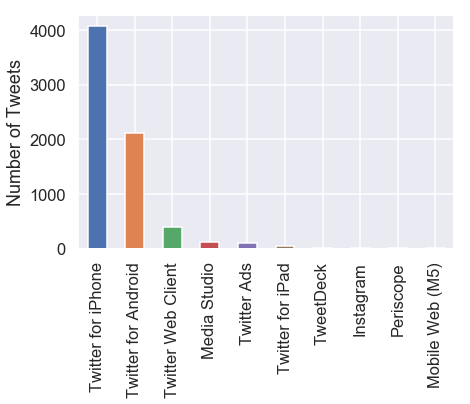

In [39]:
df_trump['source'].value_counts().plot(kind="bar")
plt.ylabel("Number of Tweets")

### Task 3.4
Is there a difference between his Tweet behavior across these devices? We will attempt to answer this question in our subsequent analysis.

First, we'll take a look at whether Trump's tweets from an Android come at different times than his tweets from an iPhone. Note that Twitter gives us his tweets in the [UTC timezone](https://www.wikiwand.com/en/List_of_UTC_time_offsets) (notice the `+0000` in the first few tweets)

In [40]:
#issue -> string indices must be integers
#replaced df_trump with trump_tweets
for t in trump_tweets[0:3]:
    print(t['created_at'])

Mon Jan 01 13:37:52 +0000 2018
Mon Jan 01 12:44:40 +0000 2018
Mon Jan 01 12:12:00 +0000 2018


We'll convert the tweet times to US Eastern Time, the timezone of New York and Washington D.C., since those are the places we would expect the most tweet activity from Trump.

In [41]:
df_trump['est_time'] = (
    df_trump['time'].dt.tz_localize("UTC") # Set initial timezone to UTC
                 .dt.tz_convert("EST") # Convert to Eastern Time
)
df_trump.head()

,time,source,text,retweet_count,est_time
id,,,,,
682723973449289728,2016-01-01 00:44:14,Twitter for Android,"I will be on @FoxNews live, with members of my family, at 11:50 P.M. We will ring in the New Year together! MAKE AMERICA GREAT AGAIN!",2108,2015-12-31 19:44:14-05:00
682764544402440192,2016-01-01 03:25:27,Twitter for iPhone,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/YO1Yi8QbZy https://t.co/uxUXWJ1Rbv,3460,2015-12-31 22:25:27-05:00
682792967736848385,2016-01-01 05:18:23,Twitter for iPhone,#HappyNewYearAmerica! https://t.co/EeQb8PDrUe,3434,2016-01-01 00:18:23-05:00
682805320217980929,2016-01-01 06:07:28,Twitter for iPhone,Happy New Year from #MarALago! Thank you to my great family for all of their support. https://t.co/6UsqSiaaj7,1948,2016-01-01 01:07:28-05:00
682805477168779264,2016-01-01 06:08:06,Twitter for Android,"""@jallenaip: Hillary said she was in a ""Fog of War"" as explanation for the lies about Benghazi. No fog allowed in WH. Vote Trump POTUS!""",2721,2016-01-01 01:08:06-05:00


**What you need to do:**

Add a column called `hour` to the `df_trump` table which contains the hour of the day as floating point number computed by:

$$
\text{hour} + \frac{\text{minute}}{60} + \frac{\text{second}}{60^2}
$$


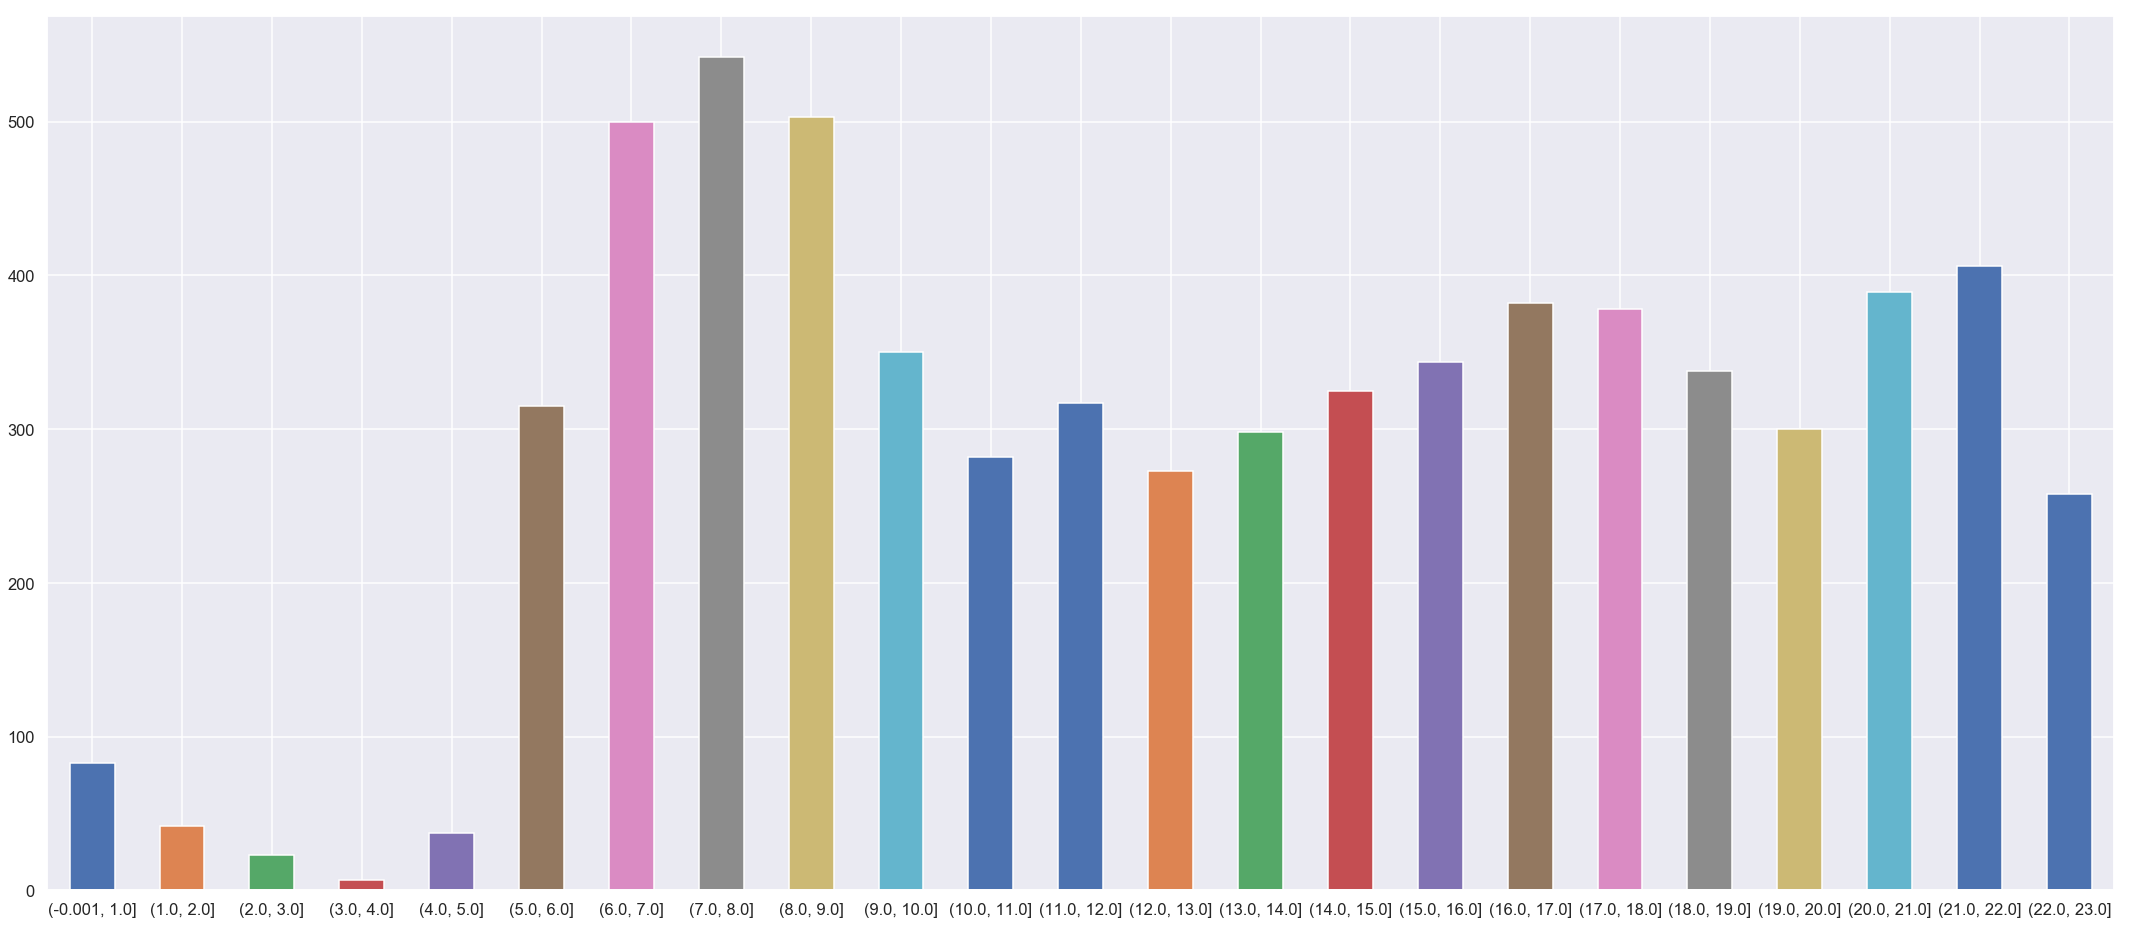

In [42]:
df_trump['hour']=[ x.hour+(x.minute/60)+(x.second/(60*60)) for x in df_trump['est_time']]
df_trump['hour']
# make a bar plot here
### BEGIN SOLUTION
#need to create bins for intervals
df_float = df_trump['hour']
#type(df_int)
df_float=df_float.reset_index()
bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
df_float['hour']
df_graph = pd.cut(df_float['hour'], bins=bins, include_lowest=True)
ax = df_graph.value_counts(sort=False).plot.bar(rot=0, figsize=(33,15))
plt.show()
### END SOLUTION

In [ ]:
#assert np.isclose(df_trump.loc[690171032150237184]['hour'], 8.93639)

Use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look somewhat similar to the following. 
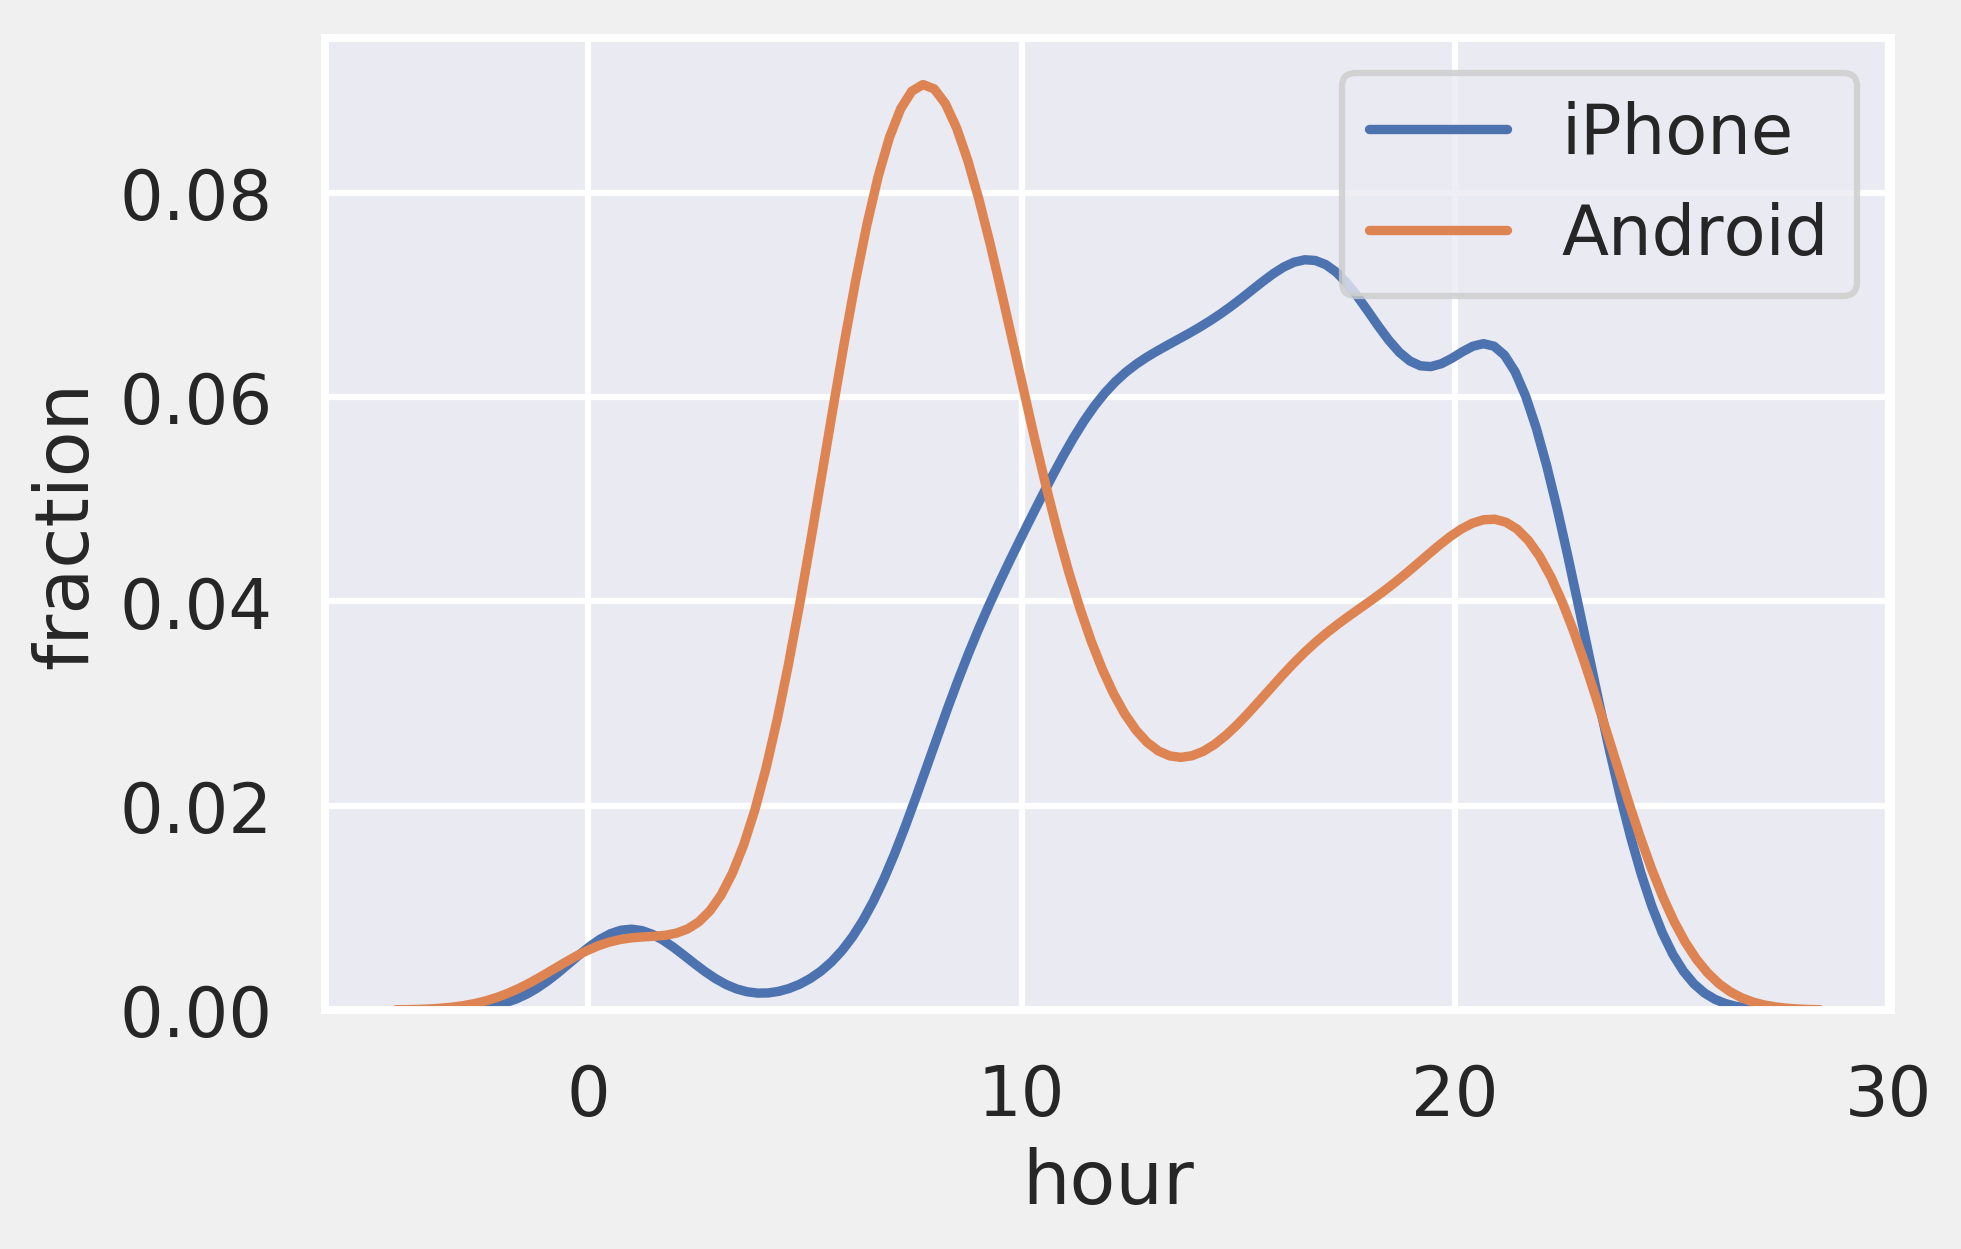


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'fraction')

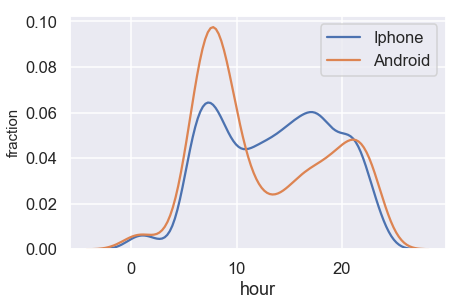

In [43]:

### BEGIN SOLUTION
df_iph= df_trump.loc[df_trump['source'] =='Twitter for iPhone' ]
df_and = df_trump.loc[df_trump['source'] =='Twitter for Android']
### make your plot here
sns.distplot(df_iph['hour'],hist=False,label="Iphone")
sns.distplot(df_and['hour'],hist=False,label="Android")
plt.ylabel('fraction', fontsize=15)
### END SOLUTION

### Task 3.5

According to [this Verge article](https://www.theverge.com/2017/3/29/15103504/donald-trump-iphone-using-switched-android), Donald Trump switched from an Android to an iPhone sometime in March 2017.

Create a figure identical to your figure from 3.4, except that you should show the results only from 2016. If you get stuck consider looking at the `year_fraction` function from the next problem.

During the campaign, it was theorized that Donald Trump's tweets from Android were written by him personally, and the tweets from iPhone were from his staff. Does your figure give support the theory?

Text(0, 0.5, 'fraction')

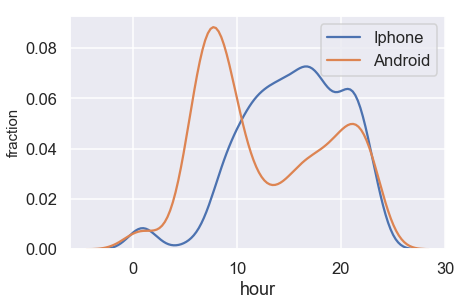

In [44]:
### BEGIN SOLUTION
df_trump['YEAR']=[ x.year for x in df_trump['est_time']]

df_trumpTemp=df_trump[df_trump['YEAR']==2016]
#df_trumpTemp
dfIphone= df_trumpTemp.loc[df_trumpTemp['source'] =='Twitter for iPhone' ]
#dfIphone
dfAndroid = df_trumpTemp.loc[df_trumpTemp['source'] =='Twitter for Android']
#dfAndroid

# code to plot
sns.distplot(dfIphone['hour'],hist=False,label="Iphone")
sns.distplot(dfAndroid['hour'],hist=False,label="Android")
plt.ylabel('fraction', fontsize=15)
### END SOLUTION

### Task 3.6
Edit this cell to answer the following questions.
* What time of the day the Android tweets were made by Trump himself? (eg: morning, late night etc)
From the hours of 3-10 Trump was making tweets from the Android himself.
* What time of the day the Android tweets were made by paid staff?
From the time the Iphone spiked up (after hour 10) is when I believe Trump's staff were making tweets from the Android as they were making Tweets from the Iphone they must have been in charge of also making tweets from the Android if that is if During the campaign, it was theorized that Donald Trump's tweets from Android were written by him personally, and the tweets from iPhone were from his staff. 

### Task 3.7 Device Analysis
Let's now look at which device he has used over the entire time period of this dataset.

To examine the distribution of dates we will convert the date to a fractional year that can be plotted as a distribution.

(Code borrowed from https://stackoverflow.com/questions/6451655/python-how-to-convert-datetime-dates-to-decimal-years)

In [45]:
import datetime
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length


df_trump['year'] = df_trump['time'].apply(year_fraction)
#df_trump['year']

Use the `sns.distplot` to overlay the distributions of the 2 most frequently used web technologies over the years.  Your final plot should be similar to:

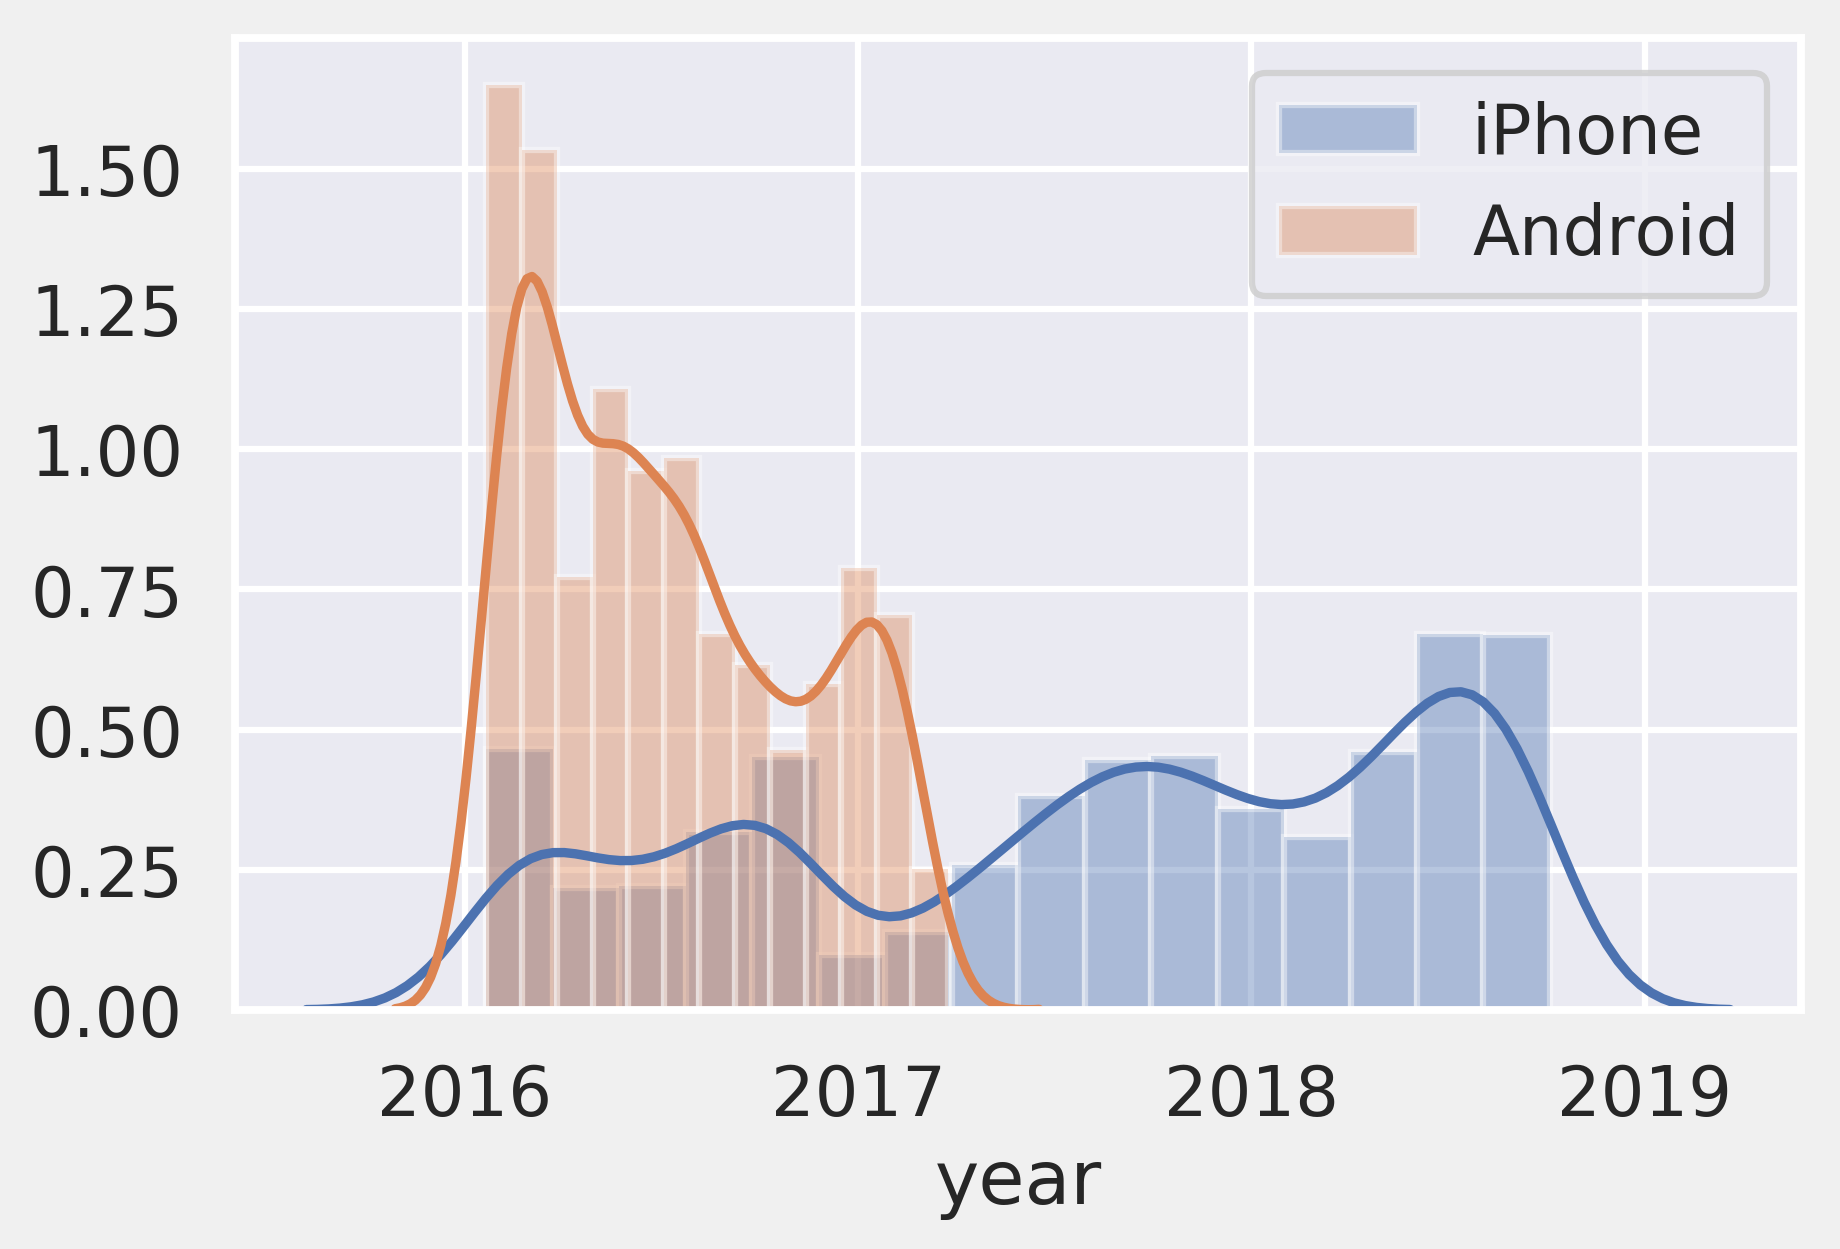

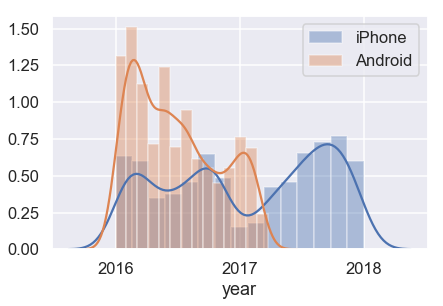

In [46]:
### BEGIN SOLUTION
trump_years = df_trump[['source', 'year']].set_index('source')
#trump_years

iph_Temp = trump_years.loc[trump_years.index == 'Twitter for iPhone']
#iph_Temp
and_Temp = trump_years.loc[trump_years.index == 'Twitter for Android']
#and_Temp

#code to plot
ax = sns.distplot(iph_Temp['year'], label = 'iPhone')
sns.distplot(and_Temp['year'], label = 'Android')
ax.set(xticks=(2016,2017,2018))
plt.legend()

### END SOLUTION

## PART 4 - Sentiment Analysis

It turns out that we can use the words in Trump's tweets to calculate a measure of the sentiment of the tweet. For example, the sentence "I love America!" has positive sentiment, whereas the sentence "I hate taxes!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I love America." is more positive than "I like America."

We will use the [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) lexicon to analyze the sentiment of Trump's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:

In [47]:
print(''.join(open("data/vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



### Task 4.1

As you can see, the lexicon contains emojis too! The first column of the lexicon is the *token*, or the word itself. The second column is the *polarity* of the word, or how positive / negative it is.

(How did they decide the polarities of these words? What are the other two columns in the lexicon? See the link above.)

 Read in the lexicon into a DataFrame called `df_sent`. The index of the DF should be the tokens in the lexicon. `df_sent` should have one column: `polarity`: The polarity of each token.

In [51]:
### BEGIN SOLUTION
with open('data/vader_lexicon.txt') as f:
    text = f.readlines()

row = text[0]
#row
newText = [row.split('\t') for row in text]
#newText

df_sent = pd.DataFrame(newText).rename(columns={0: 'tokens', 1: 'polarity'}).set_index('tokens')[['polarity']]
#df_sent
#issue polrity was not in numerical form so the asserts did not work
df_sent['polarity'] = pd.to_numeric(df_sent['polarity'])
df_sent

### END SOLUTION

,polarity
tokens,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7
( '}{' ),1.6
(%,-0.9
('-:,2.2
(':,2.3


In [52]:
assert isinstance(df_sent, pd.DataFrame)
assert df_sent.shape == (7517, 1)
assert list(df_sent.index[5000:5005]) == ['paranoids', 'pardon', 'pardoned', 'pardoning', 'pardons']
assert np.allclose(df_sent['polarity'].head(), [-1.5, -0.4, -1.5, -0.4, -0.7])

### Task 4.2

Now, let's use this lexicon to calculate the overall sentiment for each of Trump's tweets. Here's the basic idea:

1. For each tweet, find the sentiment of each word.
2. Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

First, let's lowercase the text in the tweets since the lexicon is also lowercase. Set the `text` column of the `df_trump` DF to be the lowercased text of each tweet.

In [53]:
### BEGIN SOLUTION
df_trump['text'] = df_trump['text'].str.lower()
#df_trump['text']
### END SOLUTION

In [54]:
#assert df_trump['text'].loc[884740553040175104] == 'working hard to get the olympics for the united states (l.a.). stay tuned!'

### Task 4.3

Now, let's get rid of punctuation since it'll cause us to fail to match words. Create a new column called `no_punc` in the `df_trump` to be the lowercased text of each tweet with all punctuation replaced by a single space. We consider punctuation characters to be any character that isn't a Unicode word character or a whitespace character. You may want to consult the Python documentation on regexes for this problem.

(Why don't we simply remove punctuation instead of replacing with a space? See if you can figure this out by looking at the tweet data.)

The reason that we replace it with spaces is that so its easier to tokenize the words and not have one big word.

In [55]:
# Save your regex in punct_re
punct_re = r'[^(\s\w)]'

### BEGIN SOLUTION
df_trump['no_punc'] = df_trump['text'].str.replace(punct_re, ' ')
#df_trump['no_punc']
### END SOLUTION

In [56]:
assert isinstance(punct_re, str)
assert re.search(punct_re, 'this') is None
assert re.search(punct_re, 'this is ok') is None
assert re.search(punct_re, 'this is\nok') is None
assert re.search(punct_re, 'this is not ok.') is not None
assert re.search(punct_re, 'this#is#ok') is not None
assert re.search(punct_re, 'this^is ok') is not None
#assert df_trump['no_punc'].loc[800329364986626048] == 'i watched parts of  nbcsnl saturday night live last night  it is a totally one sided  biased show   nothing funny at all  equal time for us '
#assert df_trump['no_punc'].loc[894620077634592769] == 'on  purpleheartday i thank all the brave men and women who have sacrificed in battle for this great nation   usa   https   t co qmfdlslp6p'
# If you fail these tests, you accidentally changed the text column
#assert trump['text'].loc[884740553040175104] == 'working hard to get the olympics for the united states (l.a.). stay tuned!'

### Task 4.4


Now, let's convert the tweets into what's called a [*tidy format*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) to make the sentiments easier to calculate. Use the `no_punc` column of `df_trump` to create a table called `tidy_format`. The index of the table should be the IDs of the tweets, repeated once for every word in the tweet. It has two columns:

1. `num`: The location of the word in the tweet. For example, if the tweet was "i love america", then the location of the word "i" is 0, "love" is 1, and "america" is 2.
2. `word`: The individual words of each tweet.

The first few rows of our `tidy_format` table look like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>num</th>
      <th>word</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>894661651760377856</th>
      <td>0</td>
      <td>i</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>1</td>
      <td>think</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>2</td>
      <td>senator</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>3</td>
      <td>blumenthal</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>4</td>
      <td>should</td>
    </tr>
  </tbody>
</table>

**Note that you'll get different results depending on when you pulled in the tweets.** However, you can double check that your tweet with ID `894661651760377856` has the same rows as ours. Our tests don't check whether your table looks exactly like ours.

As usual, try to avoid using any for loops. Our solution uses a chain of 5 methods on the 'trump' DF, albeit using some rather advanced Pandas hacking.

* **Hint 1:** Try looking at the `expand` argument to pandas' `str.split`.

* **Hint 2:** Try looking at the `stack()` method.

* **Hint 3:** Try looking at the `level` parameter of the `reset_index` method.

In [57]:
### BEGIN SOLUTION
#df_trump['no_punc']
temp_df = df_trump['no_punc']
temp_df1 = temp_df.str.replace('\s+', ' ')
#temp_df1
new_df = pd.DataFrame(temp_df1.str.split(expand=True).stack())
new_df.reset_index(inplace=True)
#new_df
tidy_format = new_df.set_index('id').rename(columns={'level_1': 'num', 0: 'word'})
tidy_format


### END SOLUTION

,num,word
id,,
682723973449289728,0,i
682723973449289728,1,will
682723973449289728,2,be
682723973449289728,3,on
682723973449289728,4,foxnews
682723973449289728,5,live
682723973449289728,6,with
682723973449289728,7,members
682723973449289728,8,of


In [58]:
#assert tidy_format.loc[894661651760377856].shape == (27, 2)
#assert ' '.join(list(tidy_format.loc[894661651760377856]['word'])) == 'i think senator blumenthal should take\
#a nice long vacation in vietnam where he lied about his service so he can at least say he was there'

### Task 4.5

Now that we have this table in the tidy format, it becomes much easier to find the sentiment of each tweet: we can join the table with the lexicon table. 

Add a `polarity` column to the `trump` table.  The `polarity` column should contain the sum of the sentiment polarity of each word in the text of the tweet.

**Hint** you will need to merge the `tidy_format` and `sent` tables and group the final answer.


In [60]:
#trump['polarity'] = ...

### BEGIN SOLUTION
total_polarity = (tidy_format.merge(df_sent, how = "inner",left_on = "word", right_index = True).groupby('id').sum())
#total_polarity
df_trump['polarity'] = total_polarity[['polarity']]
#df_trump['polarity']
df_trump = df_trump.fillna(value=0)

df_trump
### END SOLUTION

,time,source,text,retweet_count,est_time,hour,YEAR,year,no_punc,polarity
id,,,,,,,,,,
682723973449289728,2016-01-01 00:44:14,Twitter for Android,"i will be on @foxnews live, with members of my family, at 11:50 p.m. we will ring in the new year together! make america great again!",2108,2015-12-31 19:44:14-05:00,19.737222,2015,2016.000000,i will be on foxnews live with members of my family at 11 50 p m we will ring in the new year together make america great again,3.1
682764544402440192,2016-01-01 03:25:27,Twitter for iPhone,happy new year &amp; thank you! https://t.co/yo1yi8qbzy https://t.co/uxuxwj1rbv,3460,2015-12-31 22:25:27-05:00,22.424167,2015,2016.000000,happy new year amp thank you https t co yo1yi8qbzy https t co uxuxwj1rbv,4.2
682792967736848385,2016-01-01 05:18:23,Twitter for iPhone,#happynewyearamerica! https://t.co/eeqb8pdrue,3434,2016-01-01 00:18:23-05:00,0.306389,2016,2016.000000,happynewyearamerica https t co eeqb8pdrue,0.0
682805320217980929,2016-01-01 06:07:28,Twitter for iPhone,happy new year from #maralago! thank you to my great family for all of their support. https://t.co/6usqsiaaj7,1948,2016-01-01 01:07:28-05:00,1.124444,2016,2016.000000,happy new year from maralago thank you to my great family for all of their support https t co 6usqsiaaj7,9.0
682805477168779264,2016-01-01 06:08:06,Twitter for Android,"""@jallenaip: hillary said she was in a ""fog of war"" as explanation for the lies about benghazi. no fog allowed in wh. vote trump potus!""",2721,2016-01-01 01:08:06-05:00,1.135000,2016,2016.000000,jallenaip hillary said she was in a fog of war as explanation for the lies about benghazi no fog allowed in wh vote trump potus,-5.9
683037464504745985,2016-01-01 21:29:56,Twitter for Android,"""@sprinklermanus: @cnn @realdonaldtrump they're spending millions but you're still going to win - go donald trump""",933,2016-01-01 16:29:56-05:00,16.498889,2016,2016.000000,sprinklermanus cnn realdonaldtrump they re spending millions but you re still going to win go donald trump,2.8
683060169677344768,2016-01-01 23:00:09,Twitter for Android,"well, the year has officially begun. i have many stops planned and will be working very hard to win so that we can turn our country around!",2642,2016-01-01 18:00:09-05:00,18.002500,2016,2016.000000,well the year has officially begun i have many stops planned and will be working very hard to win so that we can turn our country around,2.9
683060654098530305,2016-01-01 23:02:05,Twitter for Android,"""@marie7777777777: @realdonaldtrump we love u to trump family. god bless you.""",654,2016-01-01 18:02:05-05:00,18.034722,2016,2016.000000,marie7777777777 realdonaldtrump we love u to trump family god bless you,6.1
683061678246903808,2016-01-01 23:06:09,Twitter for Android,"""@jodil792: we are standing with you! spreading the word...trump for president 2016!! i wake &amp; sleep praying for you &amp; the usa!+israel2""",893,2016-01-01 18:06:09-05:00,18.102500,2016,2016.000000,jodil792 we are standing with you spreading the word trump for president 2016 i wake amp sleep praying for you amp the usa israel2,1.5


In [61]:
#assert np.allclose(df_trump.loc[744701872456536064, 'polarity'], 8.4)
#assert np.allclose(df_trump.loc[745304731346702336, 'polarity'], 2.5)
#assert np.allclose(df_trump.loc[744519497764184064, 'polarity'], 1.7)
#assert np.allclose(df_trump.loc[894661651760377856, 'polarity'], 0.2)
#assert np.allclose(df_trump.loc[894620077634592769, 'polarity'], 5.4)
# If you fail this test, you dropped tweets with 0 polarity
#assert np.allclose(df_trump.loc[744355251365511169, 'polarity'], 0.0)

### Task 4.6
Now we have a measure of the sentiment of each of his tweets! You can read over the VADER readme to understand a more robust sentiment analysis.
Now, write the code to see the most positive and most negative tweets from Trump in your dataset:
Find the most negative and most positive tweets made by Trump

In [62]:
### BEGIN SOLUTION

print('Most negative tweets:')
for t in df_trump.sort_values('polarity').head()['text']:
    print('\n  ', t)

### END SOLUTION

Most negative tweets:

   horrible and cowardly terrorist attack on innocent and defenseless worshipers in egypt. the world cannot tolerate terrorism, we must defeat them militarily and discredit the extremist ideology that forms the basis of their existence!

   democrat jon ossoff would be a disaster in congress. very weak on crime and illegal immigration, bad for jobs and wants higher taxes. say no

   "@fiiibuster: @jeffzeleny pathetic - you have no sufficient evidence that donald trump did not suffer from voter fraud, shame! bad reporter.

   nyc terrorist was happy as he asked to hang isis flag in his hospital room. he killed 8 people, badly injured 12. should get death penalty!

   yet another terrorist attack today in israel -- a father, shot at by a palestinian terrorist, was killed while:
https://t.co/cv1hzkvbit


In [63]:
### BEGIN SOLUTION

print('Most positive tweets:')
for t in df_trump.sort_values('polarity', ascending=False).head()['text']:
    print('\n  ', t)
    
### END SOLUTION

Most positive tweets:

   thank you to linda bean of l.l.bean for your great support and courage. people will support you even more now. buy l.l.bean. @lbperfectmaine

   it was my great honor to celebrate the opening of two extraordinary museums-the mississippi state history museum &amp; the mississippi civil rights museum. we pay solemn tribute to our heroes of the past &amp; dedicate ourselves to building a future of freedom, equality, justice &amp; peace. https://t.co/5akgvpv8aa

   rt @ivankatrump: 2016 has been one of the most eventful and exciting years of my life. i wish you peace, joy, love and laughter. happy new…

   melania, our great and very hard working first lady, who truly loves what she is doing, always thought that “if you run, you will win.” she would tell everyone that, “no doubt, he will win.” i also felt i would win (or i would not have run) - and country is doing great!

   "@pauladuvall2: we're all enjoying you, as well, mr. t.! you've inspired hope and a posit

### Task 4.7
Plot the distribution of tweet sentiments broken down by whether the text of the tweet contains `nyt` or `fox`.  Then in the box below comment on what we observe?

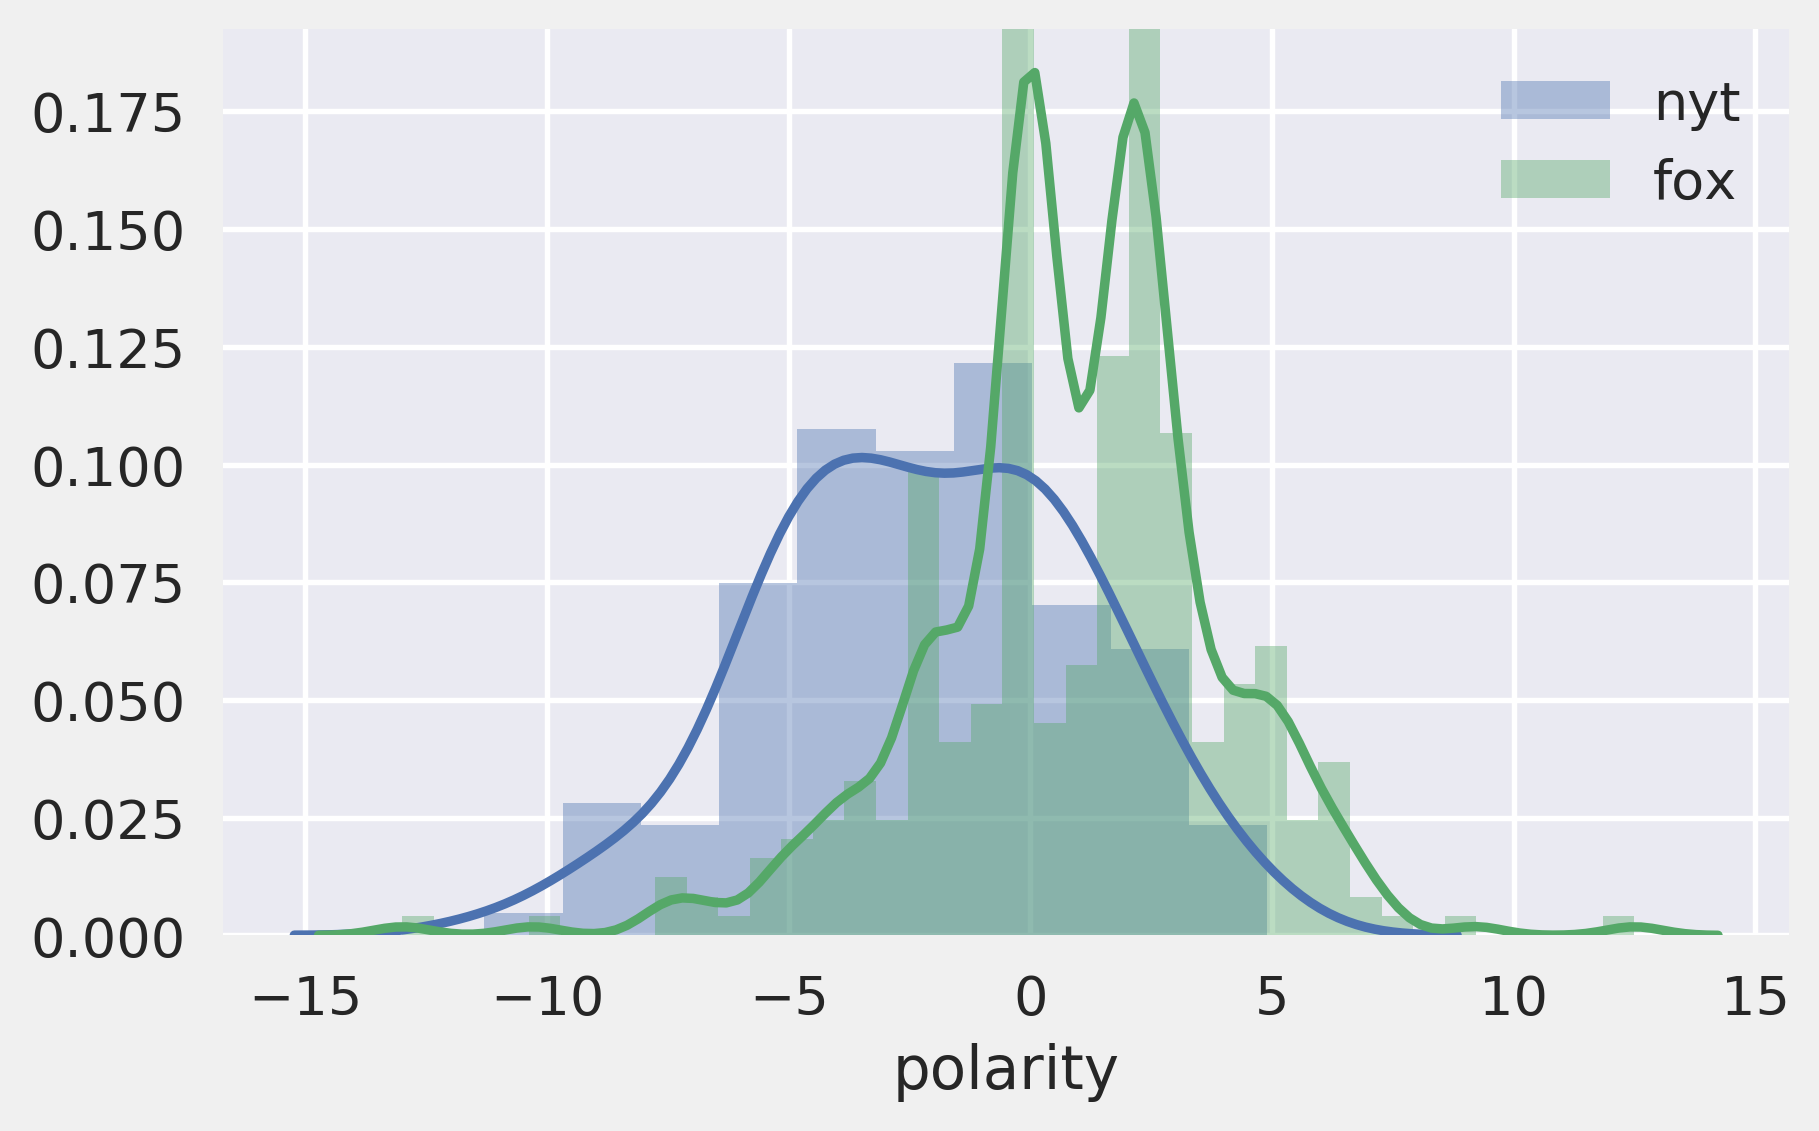

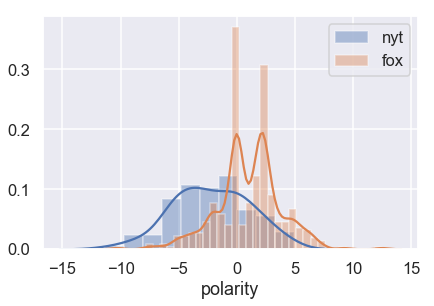

In [64]:
### BEGIN SOLUTION
df_nyt = df_trump[df_trump['no_punc'].str.contains('nyt')]['polarity']
df_fox = df_trump[df_trump['no_punc'].str.contains('fox')]['polarity']

#df_nyt
#df_fox

#plotting 
ax = sns.distplot(df_nyt, label = 'nyt')
sns.distplot(df_fox, label = 'fox')
plt.legend()



### END SOLUTION

##### Comment on what you observe:

#### BEGIN SOLUTION
From observing the graph above we can conclude that Trump's tweets with the word "fox" in them have a higher polarity than his tweets with the word "nyt". Not only are the tweets with the word "fox" popular they are more positive and as well neutral as on the graph we can see that the highest tweets with fox range from 0 to 4 meaning that most tweets are positive. On the other hand for tweets with the word "nyt" tend to have lower polarity thus resulting in more of a negative tweet as on the polarity scale it ranges from -6  to -1.  
#### END SOLUTION

## PART 5 - Principal Component Analysis (PCA) and Twitter
A look at the top words used and the sentiments expressed in Trump tweets indicates that, some words are used with others almost all the time. A notable example is the slogan like Make America Great Again. As such, it may be beneficial to look at groups of words rather than individual words. For that, we will look at an approach applying a Principal Component Analysis. 

### The PCA
The Principal Component Analysis, or PCA, is a tool generally used to identify patterns and to reduce the number of variables you have to consider in your analysis. For example, if you have data with 200 columns, it may be that a significant amount of the variance in your data can be explained by just 100 principal components. In the PCA, the first component is chosen in such a way that has the largest variance, subsequent components are orthogonal and continue covering as much variance as possible. In this way, the PCA samples as much of the variability in the data set with the first few components. Mathematically, each component is a linear combination of all the input parameters times coefficients specific for that component. These coefficients, or loading factors, are constrained such that the sum of the squares of them are equal to 1. As such, the loading factors serve as weights describing how strongly certain parameters contribute to the specific principal component. Parameters with large values of positive or negative loading factors are correlated with each other, which can serve to identify trends in your data.

### Task 5.1 Cleaning up the Data
Using NLTK (Natural Language Toolkit) package for language processing and other python libraries, parse the json file to deal with inflected words, such as plurals, and removed stop words like common English words (the, and, it, etc) and certain political terms (the candidates names, for example). You can start with the top 50 words, but full analysis may require large number of words.
Create a document-frequecy (df) matrix with 5000 rows and 50 columns where each column is a particular word (feature) and each row is a tweet (observation). The values of the matrix is how often the word appears. Apply the techniques we learned to reduce the weight of most common words (if necessary). Since this is a sparse matrix, you can use the sparse martix libraries to make things a bit more efficient (we can also use a regular numpy arrays to store these things since the dimensions are not too large). Lecture 6.1 captures some sparse matrix routines you can use.
Print the first 10 rows of the df to show the matrix you created

In [ ]:
### BEGIN SOLUTION
import nltk
## code to plot the first 10 rows of the matrix
### END SOLUTION

### Task 5.2 Find the PCA's
Write the code to find the first 50 PCA's for the document-frequency matrix. Pass the document-term-matrix to scikit-learn’s (https://scikit-learn.org/stable/modules/decomposition.html#decompositions) PCA method to obtain the components and loading factors. You can use upto 80% of the PC's to capture as much variation as possible.

In [ ]:
### BEGIN SOLUTION


### END SOLUTION

### Task 5.3 Examine the PCA
We can examine the PCA results to look at the heatmap. Make a Bokeh grid plot which shows the various principal component along the x-axis and the individual words along the y-axes. Each grid box should be color-coded based on the sign of the loading factor and how large the square of that value is. Although optional, make the plot so that you can hover over each box to the see the loading factor value for that word-component pair. Looking at it vertically, you can see which words constitute your principal components. Looking at it horizontally, you can see how individual terms are shared between components. 

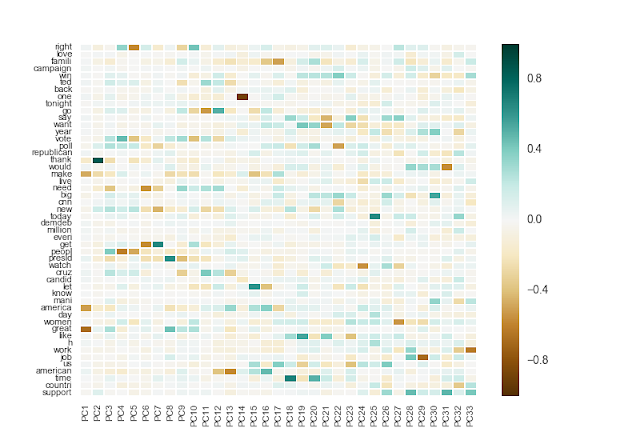



In [ ]:
### BEGIN SOLUTION


### END SOLUTION

### Task 5.4 PCA Compare
We can determine how many words and how many components are needed to do a good visualization. Plot PC1 and PC2 in a 2D plot. The results should be similar to following scatter plot (w/o Hillary Clinton). This plot shows PC4 and PC3 for a similar data set analysis. 

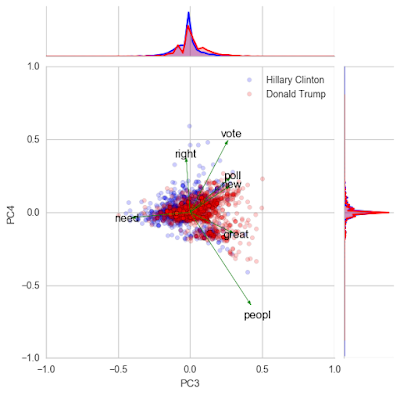

This is a scatter plot of the values of the components, but with arrows indicating some of the prominent terms as indicated by their loading factors. The values of the loading factors are used to determine the length and direction of these arrows and as such they serve as a way of expressing direction. That is, tweets which use these terms will be moved along the length of those arrows. Shown are the most important parameters.

In [ ]:
### BEGIN SOLUTION


### END SOLUTION

### Task 5.4 Another Interpretation
Interpret the results by saying that the PCA has grouped words together. For example, the words make, america, great, and again are all prominent terms in the first principal component. Instead of dealing with 4 terms we can just deal with a single term that is a combination of all four. That is, the PCA has naturally grouped words in rough phrases and instead of considering a tweet as 140 characters or as a dozen or so words, we can consider them as being located in a space defined by specific phrases. Make a plot similar to the one shown below. Your plot will have 50 rows and we have only shown a few rows here.

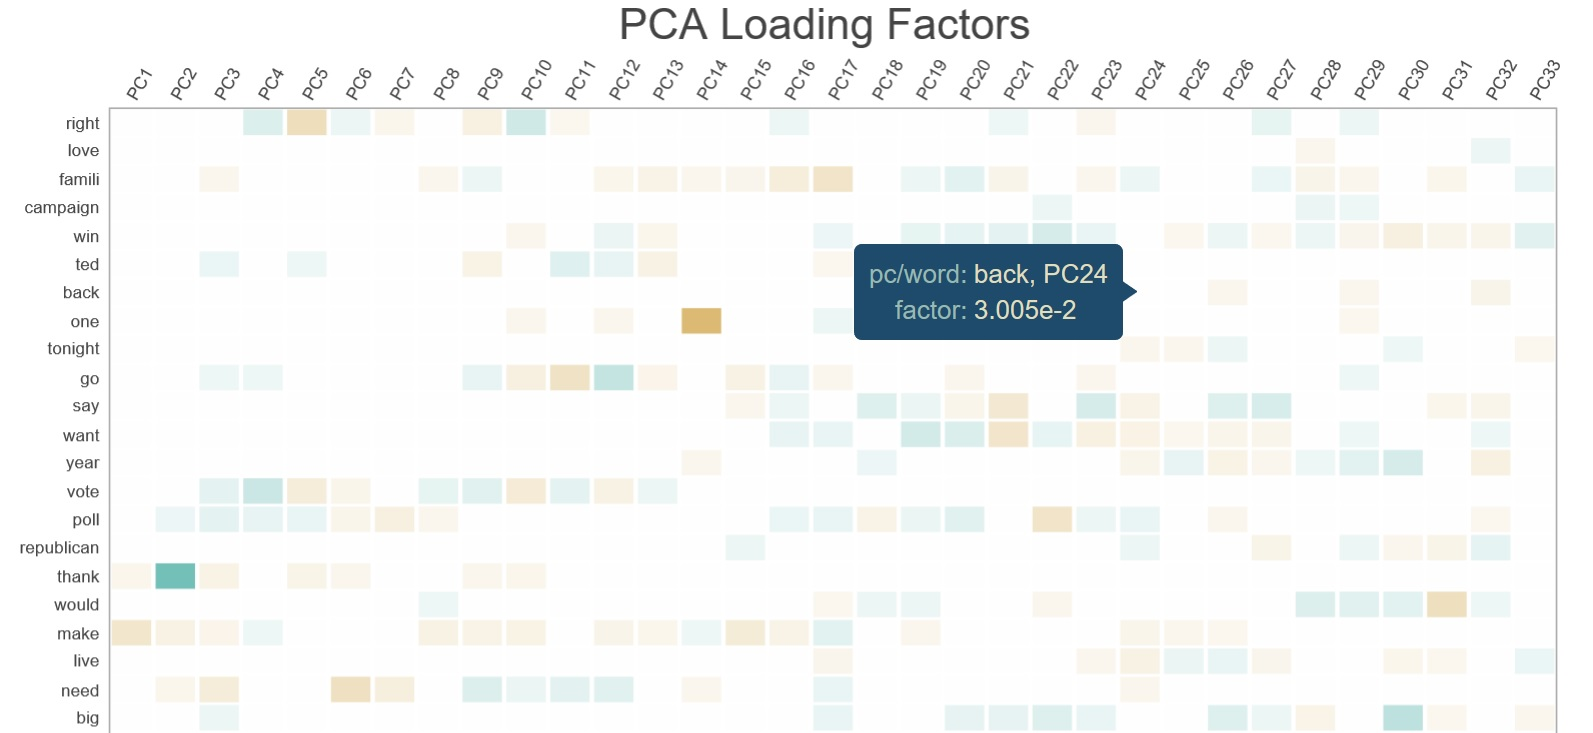


In [ ]:
### BEGIN SOLUTION


### END SOLUTION

## PART 6 - Twitter Engagement

In this problem, we'll explore which words led to a greater average number of retweets. For example, at the time of this writing, Donald Trump has two tweets that contain the word 'oakland' (tweets 932570628451954688 and 1016609920031117312) with 36757 and 10286 retweets respectively, for an average of 23,521.5.


Your `top_20` table should have this format:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>retweet_count</th>
    </tr>
    <tr>
      <th>word</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>jong</th>
      <td>40675.666667</td>
    </tr>
    <tr>
      <th>try</th>
      <td>33937.800000</td>
    </tr>
    <tr>
      <th>kim</th>
      <td>32849.595745</td>
    </tr>
    <tr>
      <th>un</th>
      <td>32741.731707</td>
    </tr>
    <tr>
      <th>maybe</th>
      <td>30473.192308</td>
    </tr>
  </tbody>
</table>

### Task 6.1
Find the top 20 most retweeted words. Include only words that appear in at least 25 tweets. As usual, try to do this without any for loops. You can string together ~7 pandas commands and get everything done on one line.

In [65]:
#top_20 = ...

### BEGIN SOLUTION
holder = (tidy_format.merge(df_trump, how = 'inner', left_index = True, right_index = True))
#print(holder)

word_counter = holder[['word', 'retweet_count']].groupby('word').count()
#print(word_counter)

#now we take words that appear in at least 25 tweets 
temp1_holder = word_counter[word_counter['retweet_count'] >= 25]
#temp1_holder

temp2 = (holder.merge(temp1_holder,how='inner',left_on='word', right_index=True))
#temp2

temp_word_sum = temp2[['word','retweet_count_x']].groupby(['word']).sum()

final = temp_word_sum.merge(temp1_holder,how='inner',left_index=True, right_index=True)
#final

final['mean'] = final['retweet_count_x']/final['retweet_count']
#final

final_final = final.sort_values('mean', ascending=False)
#final_final
top_20 = final_final.head(20)
top_20.columns = ['retweet_count', 'num_of_tweets', 'mean']
top_20

### END SOLUTION

,retweet_count,num_of_tweets,mean
word,,,
nfl,764168,27,28302.518519
anthem,688221,26,26470.038462
emails,784553,31,25308.161290
fbi,1697415,70,24248.785714
god,960947,41,23437.731707
happen,674136,29,23246.068966
fake,4314832,189,22829.798942
korea,1709993,75,22799.906667
friend,585401,26,22515.423077


In [67]:
# Although it can't be guaranteed, it's very likely that the top 5 words will still be
# in the top 20 words in the next month.
#assert 'jong'     in top_20.index
#assert 'try'     in top_20.index
#assert 'kim' in top_20.index
#assert 'un'    in top_20.index
#assert 'maybe'    in top_20.index

### Task 6.2
Plot a bar chart of your results:

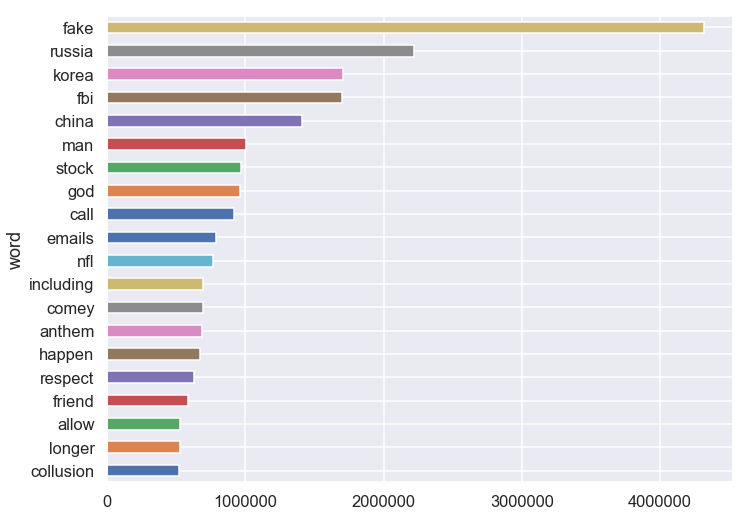

In [68]:
### BEGIN SOLUTION
top_20['retweet_count'].sort_values().plot.barh(figsize=(10, 8));
### BEGIN SOLUTION

## PART 7 - Conclusion
What else can we do? Let us ask some open ended questions.

### Task 7.1
"kim", "jong" and "un" are apparently really popular in Trump's tweets! It seems like we can conclude that his tweets involving jong are more popular than his other tweets. Or can we?

Consider each of the statements about possible confounding factors below. State whether each statement is true or false and explain. If the statement is true, state whether the confounding factor could have made kim jong un related tweets higher in the list than they should be.

1. We didn't restrict our word list to nouns, so we have unhelpful words like "let" and "any" in our result.
1. We didn't remove hashtags in our text, so we have duplicate words (eg. #great and great).
1. We didn't account for the fact that Trump's follower count has increased over time.

In [ ]:
#### BEGIN SOLUTION
#NOTE: From looking at the data above I dont see "kim", "jong", "un" in the top 20 list thus it isnt popular
#1) This is true as because having common more frequent words like "let" and "any"
# could have more retweets than "kim", "jong", "un" and becuase you removed the common words 
#"kim", "jong", "un"  would rise

#2) false we reomved dupilactes by checking for whitespaces and characters that are 
#not in the standard unicode text. becuase of this duplicates where removed
#
#3) true, trump says things no matter his following. which means that it doesnt 
# if he has 1 follower or many he still uses the same words and still wries the same as he woul
# becuase of this "kim", "jong", "un" would not be higher in the list becuase of increase follower count
#
#

#### END SOLUTION

### Task 7.2
Using the `df_trump` tweets construct an interesting plot describing a property of the data and discuss what you found below.

**Ideas:**

1. How has the sentiment changed with length of the tweets?
1. Does sentiment affect retweet count?
1. Are retweets more negative than regular tweets?
1. Are there any spikes in the number of retweets and do the correspond to world events? 
1. What terms have an especially positive or negative sentiment?

You can look at other data sources and even tweets. Do some plots and discuss. You can add more cells here as needed.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 0, 'Length of Tweet')

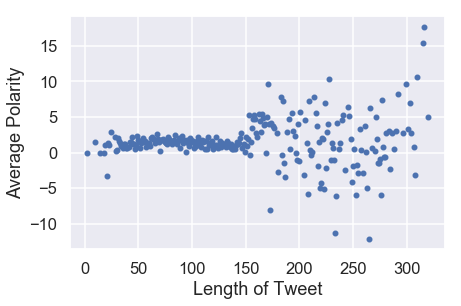

In [70]:
df_trump['tw_len'] = [len(tweet) for tweet in df_trump['no_punc']]
#df_trump['tw_len']

#place both length of tweet and polarity in a new data frame
interesting = df_trump[['polarity', 'tw_len']]
#interesting
mean_len = interesting.groupby('tw_len').mean()
#mean_len
mean_len.index.values

#clean up process
temptemptemp = mean_len.index
mean_len['tw_len'] = temptemptemp
mean_len.columns = ['polarity', 'len_tw']
mean_len = mean_len.reset_index()
mean_len = mean_len.drop(['tw_len'], axis = 1)
mean_len
mean_len.plot(x='len_tw', y='polarity', kind="scatter", use_index=True)
plt.ylabel('Average Polarity')
plt.xlabel('Length of Tweet')

#### BEGIN SOLUTION

Discussion of Your Plots:
This graph shows a postive corelation becuase as tweet length increases so does the polarity. the graph above shows the relation between ploatriy and tweet length. looking at the graph tweet lenghts vary from nothing (0) to 150.  we see that polatiry is near 0 and stays around the same level.However poliartey is random and not as dense and constant as before. the polarity is now scattard compared to the constant near 0 before 150 characters 

#### END SOLUTION


### Find Something interesting (extra credit)
Is there still something interesting to find in this data set? Use your own imagination to ask some good questions. Don't be bias and look for the answer in data. Don't ask us what we want, because we do not know either. This will be for EXTRA CREDIT. Add any cells below.


Iphone polarity average:  1.2796259842519622
Android polarity average:  0.7850661625708899


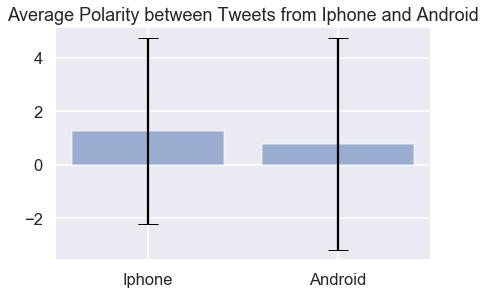

In [72]:
df_trump_Iphone = df_trump.loc[df_trump['source'] =='Twitter for iPhone' ]
df_trump_Iphone

df_trump_Android = df_trump.loc[df_trump['source'] =='Twitter for Android' ]
#df_trump_Android

#temp_pop_I = df_trump_Iphone.groupby('polarity').mean()
#temp_pop_I

#temp_pop_A = df_trump_Android.groupby('polarity').mean()
#temp_pop_A

mean_I = df_trump_Iphone['polarity'].mean()
mean_A = df_trump_Android['polarity'].mean()
print('Iphone polarity average: ',mean_I)
print('Android polarity average: ',mean_A)
fig, ax = plt.subplots()
CTEs = [mean_I, mean_A]
std_I = np.std(df_trump_Iphone['polarity'])
std_A = np.std(df_trump_Android['polarity'])
error = [std_I, std_A]
phones = ['Iphone', 'Android']
x_pos = np.arange(len(phones))
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_xticks(x_pos)
ax.set_xticklabels(phones)
ax.set_title('Average Polarity between Tweets from Iphone and Android')
ax.yaxis.grid(True)
plt.show()

Something interesting that I came across and plotted above was that trumps tweets from Iphones have on average a higher polarity than tweets posted from his Androids. The average polarity for his tweets on Iphone is 1.2796 while his average polarity from Android is 0.7850. Also the lowest polarity tweet was posted from an Android. What could this mean? Maybe users tend to like tweets from Iphones more than androids or that he has better ideas with tweets when posting with an Iphone. All that is certain is that his tweets from Iphones seem to be more popular than those from Androids sources.

In [ ]:
<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> File Name:</b> Please name the file as <your_section>_<your_netID>_Lab5.jpynb<br>
<b> Submit To: </b> Canvas &rarr; Assignments &rarr; Lab5 <br>
<b>Warning:</b> Failure to follow directions may result in loss points.<br>
</div>

Credits: Josh Hug, and Berkeley Data Science Group, Steve Skiena, David Rodreguez